In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Cleaning and Preparation 

In [5]:
# Load the dataset
sleep_health_df = pd.read_csv("Resources/Sleep_health_and_lifestyle_dataset.csv", index_col=0)
# Basic Info
sleep_health_df.info()
sleep_health_df.head()

print("CSV Columns:", sleep_health_df.columns)
print("Number of Columns:", len(sleep_health_df.columns))

<class 'pandas.core.frame.DataFrame'>
Index: 374 entries, 1 to 374
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 38.0+ KB
CSV Columns: Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of 

In [6]:
# Check for any missing values
sleep_health_df.isnull().sum()
sleep_health_df_cleaned = sleep_health_df.dropna()
sleep_health_df_cleaned['Sleep Disorder'].fillna("Unknown", inplace=True)
sleep_health_df_cleaned = sleep_health_df_cleaned.astype({'Stress Level': 'int'})

# Drop unnamed column if it exists
if "Unnamed: 0" in sleep_health_df.columns:
    sleep_health_df.drop(columns=["Unnamed: 0"], inplace=True)



C:\Users\tasee\AppData\Local\Temp\ipykernel_11256\2242057714.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sleep_health_df_cleaned['Sleep Disorder'].fillna("Unknown", inplace=True)
C:\Users\tasee\AppData\Local\Temp\ipykernel_11256\2242057714.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleep_health_df_cleaned['Sleep Disorder'].fil

In [7]:
# Save cleaned data
sleep_health_df_cleaned.to_csv("C:/Users/tasee/OneDrive/Desktop/bootcamp/Projects/Sleep-Health-Lifestyle/Resources/sleep_health_df_cleaned.csv")
sleep_health_df_cleaned

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
17,Female,29,Nurse,6.5,5,40,7,Normal Weight,132/87,80,4000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


## Data Analysis

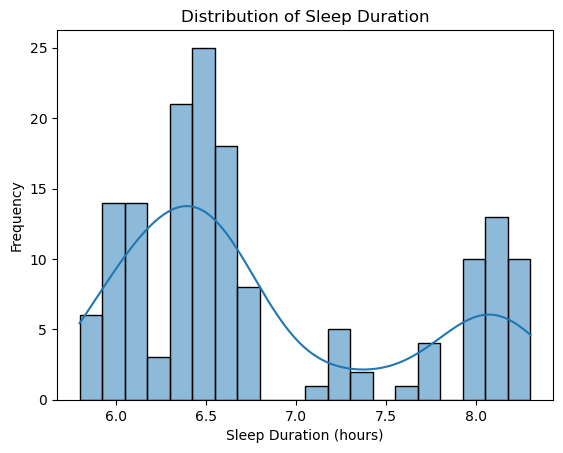

In [ ]:
# Histogram of sleep duration
plt.Figure(figsize=(10, 6))
sns.histplot(sleep_health_df_cleaned["Sleep Duration"], bins=20, kde=True)
plt.title("Distribution of Sleep Duration")
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Frequency")
plt.show()

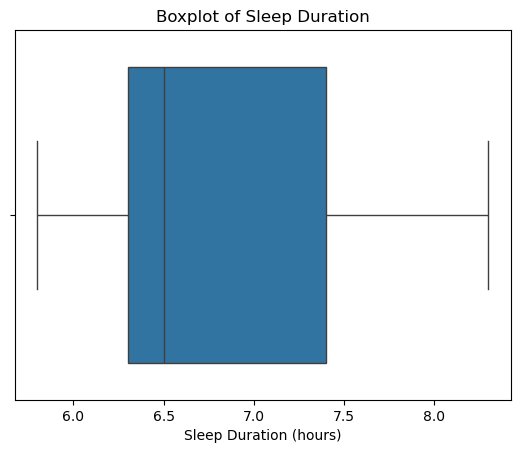

In [ ]:
# Boxplot to detect the outliers
plt.Figure(figsize=(10,6))
sns.boxplot(x=sleep_health_df_cleaned["Sleep Duration"])
plt.title("Boxplot of Sleep Duration")
plt.xlabel("Sleep Duration (hours)")
plt.show()

In [11]:
# Correlation matrix
correlation_matrix = sleep_health_df_cleaned.select_dtypes(include=['number']).corr()
print(correlation_matrix)

                              Age  Sleep Duration  Quality of Sleep  \
Age                      1.000000        0.550193          0.710221   
Sleep Duration           0.550193        1.000000          0.916748   
Quality of Sleep         0.710221        0.916748          1.000000   
Physical Activity Level  0.604725        0.240760          0.352021   
Stress Level            -0.452398       -0.848873         -0.872084   
Heart Rate              -0.373515       -0.337888         -0.534720   
Daily Steps              0.434277       -0.194249          0.025166   

                         Physical Activity Level  Stress Level  Heart Rate  \
Age                                     0.604725     -0.452398   -0.373515   
Sleep Duration                          0.240760     -0.848873   -0.337888   
Quality of Sleep                        0.352021     -0.872084   -0.534720   
Physical Activity Level                 1.000000     -0.026627    0.101348   
Stress Level                           -0

## Key insights 
1. Strong Positive Correlations (close to 1):
- Sleep Duration & Quality of Sleep (0.92) → More sleep generally means better sleep quality.
- Age & Quality of Sleep (0.71) → Older individuals tend to report better sleep quality.
- Physical Activity & Daily Steps (0.78) → Those who engage in more physical activity take more steps.
2. Moderate Positive Correlations (0.4 - 0.7):
- Age & Sleep Duration (0.55) → Older people tend to sleep longer.
- Age & Physical Activity (0.60) → Older individuals engage in more physical activity.
3. Moderate Negative Correlations (-0.4 to -0.7):
- Stress Level & Sleep Duration (-0.85) → Higher stress levels are strongly linked to less sleep.
- Stress Level & Quality of Sleep (-0.87) → Higher stress levels reduce sleep quality.
- Stress Level & Age (-0.45) → Older individuals tend to have lower stress levels.
- Heart Rate & Quality of Sleep (-0.53) → Higher heart rate is linked to worse sleep quality.
4. Weak Correlations (close to 0, meaning little to no relationship):
- Daily Steps & Quality of Sleep (0.02) → The number of steps taken daily does not significantly impact sleep quality.
- Physical Activity & Stress Level (-0.02) → Exercise does not strongly affect stress levels in this dataset.
- Daily Steps & Stress Level (0.28) → There’s a slight positive relationship, but it’s not very strong.

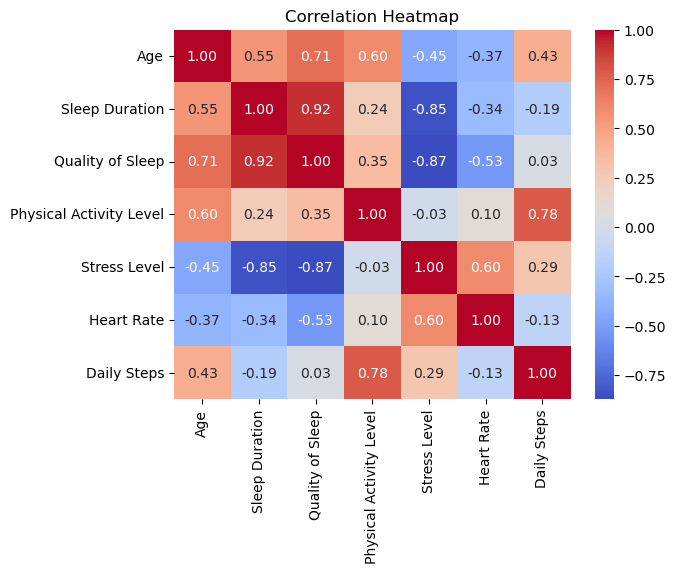

In [12]:
# Heatmap
plt.Figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

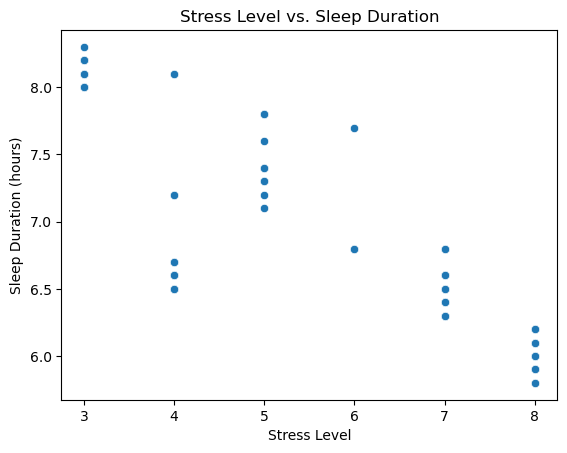

In [13]:
# Sleep Duration vs. Stress Levels
plt.Figure(figsize=(10,6))
sns.scatterplot(x=sleep_health_df_cleaned["Stress Level"], y=sleep_health_df_cleaned["Sleep Duration"])
plt.title("Stress Level vs. Sleep Duration")
plt.xlabel("Stress Level")
plt.ylabel("Sleep Duration (hours)")
plt.show()

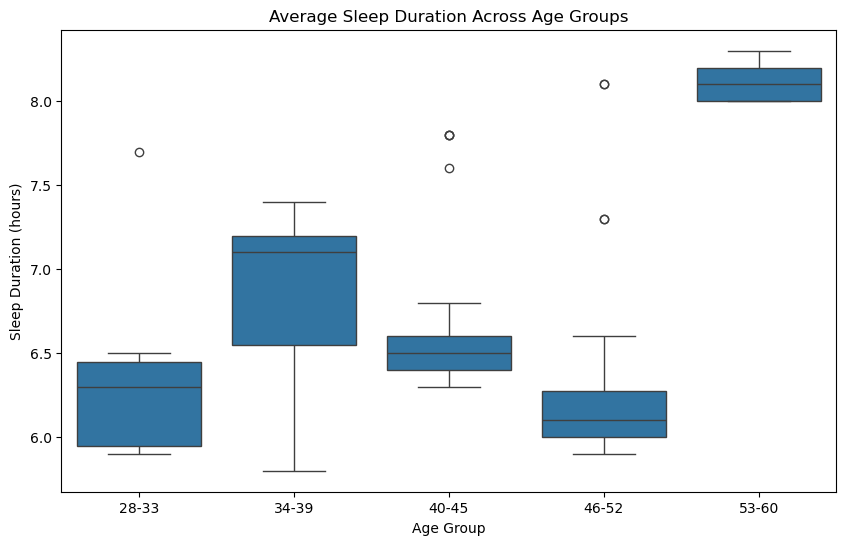

In [21]:
# Average Sleep Duration across Age Groups
bins=[28, 33, 39, 45, 52, 60]
labels=['28-33','34-39', '40-45', '46-52', '53-60']
# Create a new column for age groups
sleep_health_df_cleaned["Age Group"] = pd.cut(sleep_health_df_cleaned["Age"], bins=bins, labels=labels, include_lowest=True)
# Plot the boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x=sleep_health_df_cleaned["Age Group"], y=sleep_health_df_cleaned["Sleep Duration"])
plt.title("Average Sleep Duration Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Sleep Duration (hours)")
plt.show()

In [22]:
# Estimated sleep deficit
sleep_health_df_cleaned["Sleep Deficit"] = 8 - sleep_health_df_cleaned["Sleep Duration"]
sleep_health_df_cleaned.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Age Group,Sleep Deficit
Person ID,,,,,,,,,,,,,,
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,28-33,2.1
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,28-33,2.1
6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia,28-33,2.1
7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia,28-33,1.7
17,Female,29,Nurse,6.5,5,40,7,Normal Weight,132/87,80,4000,Sleep Apnea,28-33,1.5


In [23]:
# Stress-to-sleep Ratio
sleep_health_df_cleaned["Stress-to-sleep Ratio"] = sleep_health_df_cleaned["Stress Level"]/sleep_health_df_cleaned["Sleep Duration"]
sleep_health_df_cleaned.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Age Group,Sleep Deficit,Stress-to-sleep Ratio
Person ID,,,,,,,,,,,,,,,
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,28-33,2.1,1.355932
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,28-33,2.1,1.355932
6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia,28-33,2.1,1.355932
7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia,28-33,1.7,1.111111
17,Female,29,Nurse,6.5,5,40,7,Normal Weight,132/87,80,4000,Sleep Apnea,28-33,1.5,1.076923
